In [3]:
import torch

In [21]:
# case 1

N = 20

random0 = torch.randn(int(N/2),1); random5 = torch.randn(int(N/2),1) + 5

class1_data = torch.hstack([random0, random5])
class2_data = torch.hstack([random5, random0])

class1_label = torch.ones(int(N/2),1)
class2_label = torch.zeros(int(N/2),1)
print(class1_data)
print(class2_data)




X = torch.vstack([class1_data,class2_data])
y = torch.vstack([class1_label,class2_label])

tensor([[-3.3241e+00,  4.2092e+00],
        [ 7.3125e-04,  5.1067e+00],
        [ 6.2658e-01,  4.5031e+00],
        [ 1.2750e+00,  6.4987e+00],
        [ 4.9190e-01,  4.1026e+00],
        [-1.8026e+00,  4.0751e+00],
        [ 3.8535e-01,  4.0983e+00],
        [-1.8340e+00,  4.0638e+00],
        [-1.5789e+00,  4.7856e+00],
        [-1.4898e-01,  3.9015e+00]])
tensor([[ 4.2092e+00, -3.3241e+00],
        [ 5.1067e+00,  7.3125e-04],
        [ 4.5031e+00,  6.2658e-01],
        [ 6.4987e+00,  1.2750e+00],
        [ 4.1026e+00,  4.9190e-01],
        [ 4.0751e+00, -1.8026e+00],
        [ 4.0983e+00,  3.8535e-01],
        [ 4.0638e+00, -1.8340e+00],
        [ 4.7856e+00, -1.5789e+00],
        [ 3.9015e+00, -1.4898e-01]])


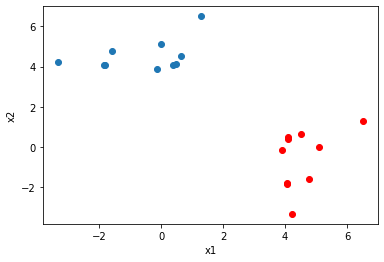

In [23]:
import matplotlib.pyplot as plt

plt.plot(class1_data[:,0],class1_data[:,1], 'o')
plt.plot(class2_data[:,0],class2_data[:,1], 'ro')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#모델 만들기

In [24]:
from torch import nn

class MLP(nn.Module) :
    def __init__(self):
        super().__init__()

        self.fcs = nn.Sequential(nn.Linear(2,100),
                                 nn.Sigmoid(),
                                 nn.Linear(100,1),
                                 nn.sigmoid())
        def forward(self, x):
            x = self.fcs(x)
            return x